## Final Project Submission

Please fill out:
* Student name: Kelvin Sila Muia
* Student pace: part time
* Scheduled project review date/time: 07/23/2023
* Instructor name: Asha Deen 


#### Project Title:  Microsoft in Movie Industry

#### Business Problem

Microsoft has stated their desire to enter the film business. They will establish a studio but must familiarize themselves with the film business. My objective is to gather, clean, and analyze movie data from many sources to make recommendations to Microsoft to help them succeed in the movie business.

#### Data
Utilized datasets include:

1. imdb.name.basics.csv.gz
2. imdb.title.basics.csv.gz
3. tn.movie_budgets.csv.gz






### Data Exploration
The purpose of this project was to explore and answer the following research questions for the benefit of microsoft's idea to venture into movie industry
1. Which movie were most profitable since 2015 and what was their budget?
2. What genres have the most movies produced? 
3. What movie genres are most produced?
4. Which genres have the most user ratings. Does high ratings translate to high profit margins?
5. What is the best time of the year to release a movie?




#### Loading Appropriate Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
%matplotlib inline

#### Loading Appropriate Data Sets

In [2]:
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
imdb_title_ratings = pd.read_csv ('zippedData/imdb.title.ratings.csv.gz')
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
budgets=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')


In [3]:
# Displaying the first five elements of the datasets
bom_movie_gross.head ()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
imdb_title_ratings.head ()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [5]:
imdb_title_basics. head ()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
budgets.head ()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


##### Data Types Contained in Each Column

In [7]:
# Data types for imdb_title_basics table
imdb_title_basics.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [8]:
# Data types for imdb_title_ratings table
imdb_title_ratings.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [9]:
# Data types for bom_movie_gross table
bom_movie_gross. info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [10]:
# Data types for budgets table
budgets.info ()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Data Preparation

Data preparation for this project will involve several aspects including
1. Merging some tables
2. Removing duplicates
3. Removing unnecessary columns that do not help in addressing our research questions
4. Converting data types

### Merging Tables
From the able data sets, merging the IMDB tables is essential to simplify our efforts in ascertain missing values genre columns

In [11]:
# let's merge IMDB using primary key (tconst) on imdb_title_basics table
# which is also a foreign key on imdb_title_ratings table 
imdb_df = imdb_title_basics.merge (imdb_title_ratings, how ='right', on = 'tconst')
imdb_df.head ()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,8.3,31
1,tt10384606,Borderless,Borderless,2019,87.0,Documentary,8.9,559
2,tt1042974,Just Inès,Just Inès,2010,90.0,Drama,6.4,20
3,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352
4,tt1060240,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller",6.5,21


In [12]:
len (imdb_df)

73856

In [13]:
imdb_df.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [14]:
# Let's evaluating the missing values on the imdb_df table
imdb_df.isna ().sum ()

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [15]:
# It is important we fill in the missing values on genre column with None
imdb_df['genres'].fillna('None', inplace=True)
imdb_df = imdb_df[imdb_df['averagerating'].notna()]
imdb_df.isna ().sum ()

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres                0
averagerating         0
numvotes              0
dtype: int64

#### Data Type Conversion
Financial analysis with python requires data types to be compatible with specific computations. For instance, calculating profit, one requires to use integers and not strings (objects). Converting data types will help in ensuring different datatypes match during our analysis. From the preview of the data types above, it is evident that production budget is in object (string) format instead of being an integer. Also, we should format the date to an appropriate format

In [16]:
# it is important to ensure data types are compatible across tables for easier financial analysis
# Data cleaning with involve converting some columns in the budgets tables 
# such as production_budgets from objects (string) to integers
# In budgets, we often talk of numbers and not string
# Also, we also need to convert dates into the apropriate formats


In [17]:
#Converting date formats
budgets['release_date'] = pd.to_datetime(budgets['release_date'])
budgets['release_year'] = budgets['release_date'].dt.year
#budgets['release_month'] = budgets['release_date'].dt.month
dateData =  [x.strftime('%B') for x in budgets['release_date']]
budgets['release_month'] = dateData


In [18]:
#Removing commas in the production_budget, domestic_gross, and worldwide_gross columns
budgets['production_budget'] = budgets['production_budget'] \
                                 .replace(',', '', regex = True)
budgets['worldwide_gross'] = budgets['worldwide_gross'] \
                               .replace(',', '', regex = True)
budgets['domestic_gross'] = budgets['domestic_gross'] \
                              .replace(',', '', regex = True)
budgets.head ()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
0,1,2009-12-18,Avatar,$425000000,$760507625,$2776345279,2009,December
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,$410600000,$241063875,$1045663875,2011,May
2,3,2019-06-07,Dark Phoenix,$350000000,$42762350,$149762350,2019,June
3,4,2015-05-01,Avengers: Age of Ultron,$330600000,$459005868,$1403013963,2015,May
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,$317000000,$620181382,$1316721747,2017,December


In [19]:
# Removing the Dollar Sign ($) and converting to int data type

budgets['production_budget'] = budgets['production_budget'] \
                                 .str[1:].astype(np.int64)
budgets['domestic_gross'] = budgets['domestic_gross'] \
                              .str[1:].astype(np.int64)
budgets['worldwide_gross'] = budgets['worldwide_gross'].str[1:] \
                               .astype(np.int64)

budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,December
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,May
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,June
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,May
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,December


### Let's Now Drop Unnecessary Columns
Some of the columns in our selected data sets may not be important in answering our research questions. 
However, i was in dilema where to drop the worldwide_gross column and instead analyse the profit no domestic level and vice versa. 
I opted to analyze the profit both locally and internationally

In [20]:
budgets.head ()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,December
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,May
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,June
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,May
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,December


In [21]:
# Droping the id column since the table already has an id column
budgets.drop (columns = ['id'], inplace = True)
budgets.head ()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
0,2009-12-18,Avatar,425000000,760507625,2776345279,2009,December
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,May
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,June
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,May
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,December


### Let's Drop Data Entries with Missing Values
Some values like 0 on the domestic_gross or worldwide_gross are not helpful in our analysis. Thus, it is important to address the missing values by removing them

In [22]:
# Removing 0 entries on domestic_gross and worldwide_gross
budgets = budgets [budgets['domestic_gross'] !=0]
budgets = budgets [budgets['worldwide_gross'] !=0]

budgets.head ()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
0,2009-12-18,Avatar,425000000,760507625,2776345279,2009,December
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,May
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,June
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,May
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,December


In [23]:
budgets

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
0,2009-12-18,Avatar,425000000,760507625,2776345279,2009,December
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,May
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,June
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,May
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,December
...,...,...,...,...,...,...,...
5775,2006-05-26,Cavite,7000,70071,71644,2006,May
5776,2004-12-31,The Mongol King,7000,900,900,2004,December
5778,1999-04-02,Following,6000,48482,240495,1999,April
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338,2005,July


### Merging Financial Data with Basic Movie Data
Initially, we had merged imdb_title_basics table with  imdb_title_ratings table for one table called imdb_df that contains basic information about the movies. It is now time we combine the imdb_df with the budgets table to using the release year and the title. We will use the left merge to ensure we onlu have titles that contain financial data only

In [24]:
# Joining financial data with the basic movie data
combined_data = budgets.merge (imdb_df, how= 'left', left_on=['movie', \
                                                           'release_year'], \
                             right_on=['original_title', 'start_year']) 
combined_data. head ()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,2009-12-18,Avatar,425000000,760507625,2776345279,2009,December,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,May,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",6.6,447624.0
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,June,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,May,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,December,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
combined_data.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5258 entries, 0 to 5257
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5258 non-null   datetime64[ns]
 1   movie              5258 non-null   object        
 2   production_budget  5258 non-null   int64         
 3   domestic_gross     5258 non-null   int64         
 4   worldwide_gross    5258 non-null   int64         
 5   release_year       5258 non-null   int64         
 6   release_month      5258 non-null   object        
 7   tconst             1330 non-null   object        
 8   primary_title      1330 non-null   object        
 9   original_title     1330 non-null   object        
 10  start_year         1330 non-null   float64       
 11  runtime_minutes    1325 non-null   float64       
 12  genres             1330 non-null   object        
 13  averagerating      1330 non-null   float64       
 14  numvotes

Now we have one table that is essential for our analysis. However, it is still important to check for missing values and duplicates that can negatively impact our financial analysis

In [26]:
# Removing any missing data from the ratings
combined_data = combined_data[combined_data['averagerating'].notna()] \
                                                .sort_values('release_year')

combined_data.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2530,2010-09-24,You Again,20000000,25702053,32838945,2010,September,tt1414382,You Again,You Again,2010.0,105.0,"Comedy,Family,Romance",5.8,46690.0
2501,2010-08-18,Vampires Suck,20000000,36661504,81424988,2010,August,tt1666186,Vampires Suck,Vampires Suck,2010.0,82.0,Comedy,3.4,43984.0
2467,2010-04-02,Why Did I Get Married Too?,20000000,60095852,60831067,2010,April,tt1391137,Why Did I Get Married Too?,Why Did I Get Married Too?,2010.0,121.0,"Comedy,Drama,Romance",4.6,8653.0
2466,2010-03-31,The Last Song,20000000,62950384,92678948,2010,March,tt1294226,The Last Song,The Last Song,2010.0,107.0,"Drama,Music,Romance",6.0,74914.0
2449,2010-10-15,Jackass 3D,20000000,117229692,171685793,2010,October,tt1116184,Jackass 3D,Jackass 3D,2010.0,95.0,"Action,Comedy,Documentary",7.0,53289.0


### Now, Let's Check and Drop Duplicates
Duplicates can give us a false impression of financial status expecially when calculating the most profitable genre. It is thus important to remove them before starting our data analysis

In [27]:
# Checking for duplicates on the movie column
combined_data ['movie'].duplicated ().sum ()

25

In [28]:
# Checking for duplicates on the release data column
combined_data ['release_date'].duplicated ().sum ()

774

In [29]:
# Droping the duplicates based on publicated movie titles and their year of release
combined_data [combined_data.duplicated (subset =['movie', 'release_date'],
                                    keep=False)].head ()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2654,2010-12-10,The Tempest,20000000,277943,277943,2010,December,tt1683003,The Tempest,The Tempest,2010.0,131.0,Drama,7.8,94.0
2653,2010-12-10,The Tempest,20000000,277943,277943,2010,December,tt1274300,The Tempest,The Tempest,2010.0,110.0,"Comedy,Drama,Fantasy",5.4,7073.0
1263,2010-03-19,The Bounty Hunter,45000000,67061228,135808837,2010,March,tt1472211,The Bounty Hunter,The Bounty Hunter,2010.0,NaN,None,6.3,29.0
1262,2010-03-19,The Bounty Hunter,45000000,67061228,135808837,2010,March,tt1038919,The Bounty Hunter,The Bounty Hunter,2010.0,110.0,"Action,Comedy,Romance",5.6,112444.0
1017,2010-11-24,Burlesque,55000000,39440655,90552675,2010,November,tt1586713,Burlesque,Burlesque,2010.0,NaN,Drama,7.0,45.0


In [30]:
# prepare to drop duplicates by sorting the numvotes values
combined_data.sort_values ('numvotes', inplace=True,ascending=False,)
#Lets remove the movie duplicates that have fewer votes
combined_data.drop_duplicates(subset=[ 'release_date', 'movie'], inplace=True)

combined_data.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
139,2010-07-16,Inception,160000000,292576195,835524642,2010,July,tt1375666,Inception,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0
10,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,2012,July,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012.0,164.0,"Action,Thriller",8.4,1387769.0
133,2014-11-05,Interstellar,165000000,188017894,666379375,2014,November,tt0816692,Interstellar,Interstellar,2014.0,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334.0
369,2012-12-25,Django Unchained,100000000,162805434,449948323,2012,December,tt1853728,Django Unchained,Django Unchained,2012.0,165.0,"Drama,Western",8.4,1211405.0
26,2012-05-04,The Avengers,225000000,623279547,1517935897,2012,May,tt0848228,The Avengers,The Avengers,2012.0,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0


In [31]:
# Let's see if we managed to remove the duplicates
len (combined_data[combined_data.duplicated(subset=[ 'movie','release_date'], \
                                   keep=False)])

0

### Limiting Data By Release Date
Movie industry is mostly affected my changes in the social contexts. Most movies are filmed to reflect our society. Therefore, some genres which were profitable 10 years ago, many not be same profitable genres in 5 years. Therefore, i will limit my analysis to the movies that were released in the last 5 years or from 2015

In [32]:
# clean out old movies
combined_data = combined_data[(combined_data ['release_year'] >= 2015)] \
                      .sort_values('release_date')
combined_data 


,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
742,2015-01-16,Blackhat,70000000,8005980,19665004,2015,January,tt2717822,Blackhat,Blackhat,2015.0,133.0,"Action,Crime,Thriller",5.4,48427.0
2328,2015-01-16,The Wedding Ringer,23000000,64460211,80171596,2015,January,tt0884732,The Wedding Ringer,The Wedding Ringer,2015.0,101.0,Comedy,6.7,66893.0
942,2015-01-23,Mortdecai,60000000,7696134,30396134,2015,January,tt3045616,Mortdecai,Mortdecai,2015.0,107.0,"Action,Comedy,Crime",5.5,61366.0
4286,2015-01-23,The Boy Next Door,4000000,36006065,53401938,2015,January,tt3181822,The Boy Next Door,The Boy Next Door,2015.0,91.0,"Horror,Thriller",4.7,34816.0
3295,2015-01-30,Project Almanac,12000000,22348241,32909437,2015,January,tt2436386,Project Almanac,Project Almanac,2015.0,106.0,"Drama,Mystery,Sci-Fi",6.4,71500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,2019-05-31,Godzilla: King of the Monsters,170000000,85576941,299276941,2019,May,tt3741700,Godzilla: King of the Monsters,Godzilla: King of the Monsters,2019.0,132.0,"Action,Adventure,Fantasy",6.7,36479.0
1358,2019-05-31,Rocketman,41000000,57342725,108642725,2019,May,tt2066051,Rocketman,Rocketman,2019.0,121.0,"Biography,Drama,Music",7.7,24266.0
580,2019-06-07,The Secret Life of Pets 2,80000000,63795655,113351496,2019,June,tt5113040,The Secret Life of Pets 2,The Secret Life of Pets 2,2019.0,86.0,"Adventure,Animation,Comedy",6.6,3467.0
4340,2019-06-07,Late Night,4000000,246305,246305,2019,June,tt6107548,Late Night,Late Night,2019.0,102.0,"Comedy,Drama",5.9,953.0


In [33]:
combined_data [combined_data.duplicated (subset =['movie', 'release_date'],
                                    keep=False)]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes


### Data Analysis
The data analysis part will attempt to answer our research questions and use visualizations to make the best business recommendations for microsoft
##### Research Requestions Recap
1. Which movie were most profitable since 2015 and what was their budget?
2. What genres have the most movies produced? 
3. What movie genres are most produced?
4. Which genres have the most user ratings. Does high ratings translate to high profit margins?
5. What is the best time of the year to release a movie?

Formula for the Profit
1. worldwide_profit = worldwide_gross-production_budget


In [34]:
# Set theme and style for plots.
sns.set_theme('talk')
sns.set_style('dark')

## 1. Which movie genres are most profitable and its budget?
I will answer this question on  global scale. We also need to put into consideration the current US inflation of  2.97 as of July 22, 2023 and adjust the profits and estimated budgets accordingly. Analyzing which movie was most profitable since 2015 whill help microsoft make an informed decision on whether to invest in creating a movie of the genre


In [35]:
# Calculating the profits on the global scale
combined_data['profit'] = combined_data['worldwide_gross'] - combined_data['production_budget']

combined_data ['profit_margin'] = (combined_data['worldwide_gross'] - 
                                    combined_data['production_budget'])/combined_data['worldwide_gross']
combined_data.head ()


,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,profit,profit_margin
742,2015-01-16,Blackhat,70000000,8005980,19665004,2015,January,tt2717822,Blackhat,Blackhat,2015.0,133.0,"Action,Crime,Thriller",5.4,48427.0,-50334996,-2.559623
2328,2015-01-16,The Wedding Ringer,23000000,64460211,80171596,2015,January,tt0884732,The Wedding Ringer,The Wedding Ringer,2015.0,101.0,Comedy,6.7,66893.0,57171596,0.713115
942,2015-01-23,Mortdecai,60000000,7696134,30396134,2015,January,tt3045616,Mortdecai,Mortdecai,2015.0,107.0,"Action,Comedy,Crime",5.5,61366.0,-29603866,-0.973935
4286,2015-01-23,The Boy Next Door,4000000,36006065,53401938,2015,January,tt3181822,The Boy Next Door,The Boy Next Door,2015.0,91.0,"Horror,Thriller",4.7,34816.0,49401938,0.925096
3295,2015-01-30,Project Almanac,12000000,22348241,32909437,2015,January,tt2436386,Project Almanac,Project Almanac,2015.0,106.0,"Drama,Mystery,Sci-Fi",6.4,71500.0,20909437,0.635363


In [36]:
combined_data ['release_date'].duplicated ().sum ()

305

In [37]:
# Adjusting the profit and budget to incorporate the inflation rates
combined_data['adjusted_budget'] = ((((2023-combined_data['release_year'])*.0297)+1)*
                                      combined_data['production_budget'])
combined_data['adjusted_profit'] = (((2023-combined_data['release_year'])*.0297)+1)*combined_data['profit']
combined_data.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,profit,profit_margin,adjusted_budget,adjusted_profit
742,2015-01-16,Blackhat,70000000,8005980,19665004,2015,January,tt2717822,Blackhat,Blackhat,2015.0,133.0,"Action,Crime,Thriller",5.4,48427.0,-50334996,-2.559623,86632000.0,-6.229459e+07
2328,2015-01-16,The Wedding Ringer,23000000,64460211,80171596,2015,January,tt0884732,The Wedding Ringer,The Wedding Ringer,2015.0,101.0,Comedy,6.7,66893.0,57171596,0.713115,28464800.0,7.075557e+07
942,2015-01-23,Mortdecai,60000000,7696134,30396134,2015,January,tt3045616,Mortdecai,Mortdecai,2015.0,107.0,"Action,Comedy,Crime",5.5,61366.0,-29603866,-0.973935,74256000.0,-3.663774e+07
4286,2015-01-23,The Boy Next Door,4000000,36006065,53401938,2015,January,tt3181822,The Boy Next Door,The Boy Next Door,2015.0,91.0,"Horror,Thriller",4.7,34816.0,49401938,0.925096,4950400.0,6.113984e+07
3295,2015-01-30,Project Almanac,12000000,22348241,32909437,2015,January,tt2436386,Project Almanac,Project Almanac,2015.0,106.0,"Drama,Mystery,Sci-Fi",6.4,71500.0,20909437,0.635363,14851200.0,2.587752e+07


For this question, we will focus on profitable genres that microsoft can consider. 
I will create another dataframe called profitable_genre where profit column is greater than 0 and then sort by adjusted_profit to ensure i rank the genre per their profitability

In [38]:
profitable_movies = combined_data.loc[combined_data['profit'] > 0]
ranking = profitable_movies.sort_values(by=['adjusted_profit'], ascending=False)
ranking.reset_index(inplace=True)
ranking.head()

,index,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,profit,profit_margin,adjusted_budget,adjusted_profit
0,6,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,April,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0,1748134200,0.853525,344550000.0,2.007732e+09
1,33,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015,June,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,1433854864,0.869606,266084000.0,1.774539e+09
2,668,2015-07-10,Minions,74000000,336045770,1160336173,2015,July,tt2293640,Minions,Minions,2015.0,91.0,"Adventure,Animation,Comedy",6.4,193917.0,1086336173,0.936225,91582400.0,1.344450e+09
3,3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,May,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0,1072413963,0.764364,409150560.0,1.327220e+09
4,41,2018-02-16,Black Panther,200000000,700059566,1348258224,2018,February,tt1825683,Black Panther,Black Panther,2018.0,134.0,"Action,Adventure,Sci-Fi",7.3,516148.0,1148258224,0.851660,229700000.0,1.318775e+09


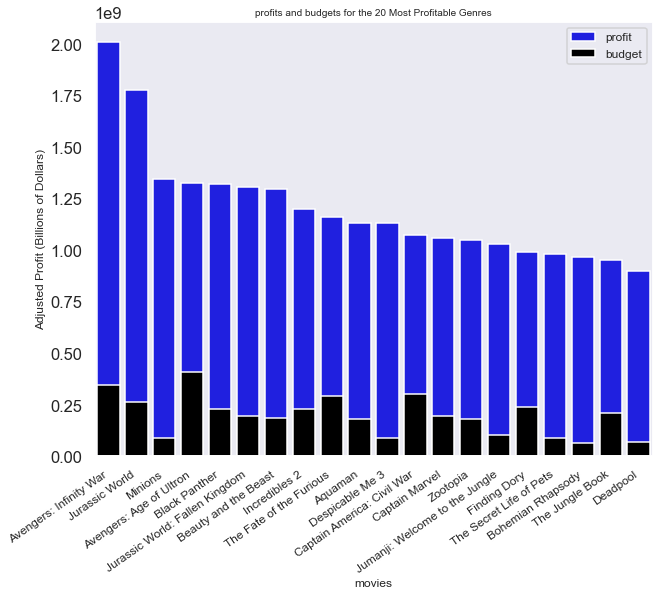

In [39]:
plt.figure(figsize=(10,8))
sns.barplot(x=ranking.loc[0:19, 'movie'],y= ranking.loc[0:19, 'adjusted_profit'], 
            color='blue', label='profit', ci=None)
sns.barplot(x=ranking.loc[0:19, 'movie'],y=ranking.loc[0:19, 'adjusted_budget'], 
            color='black', label='budget', ci=None)
plt.xlabel('movies', fontsize=12)
plt.title("profits and budgets for the 20 Most Profitable Genres", fontsize=10)
plt.ylabel('Adjusted Profit (Billions of Dollars)', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12);

In [40]:
ranking ['adjusted_budget'].describe ()

count    4.330000e+02
mean     6.738937e+07
std      7.499656e+07
min      1.178200e+05
25%      1.378200e+07
50%      3.712800e+07
75%      9.158240e+07
max      4.091506e+08
Name: adjusted_budget, dtype: float64

In [41]:
ranking.loc [0:19,'adjusted_budget'].describe ()

count    2.000000e+01
mean     1.991484e+08
std      9.552243e+07
min      6.316750e+07
25%      1.024241e+08
50%      1.955175e+08
75%      2.477060e+08
max      4.091506e+08
Name: adjusted_budget, dtype: float64

In [42]:
ranking ['profit_margin'].describe ()

count    433.000000
mean       0.637984
std        0.234586
min        0.010071
25%        0.507245
50%        0.689538
75%        0.818249
max        0.997599
Name: profit_margin, dtype: float64

In [43]:
ranking.loc[0:19,'profit_margin'].describe ()

count    20.000000
mean      0.861556
std       0.052170
min       0.764364
25%       0.833840
50%       0.857009
75%       0.908871
max       0.938546
Name: profit_margin, dtype: float64

In [44]:
len(ranking.loc[ranking['profit_margin'] > 0.5])


325

##### Let's do some data filtering

In [45]:
#Let's filter the data with a profit margin of 75% or greater and a budget greater than $34,830,000.
filtered_data = ranking.loc[(ranking['profit_margin'] >= 0.75) & 
                         (ranking['adjusted_budget'] > 195517500)]
len(filtered_data)

18

After filtering, we have 18 genres to make our conclusions

#### Using Scater Plot to Determine any Trends


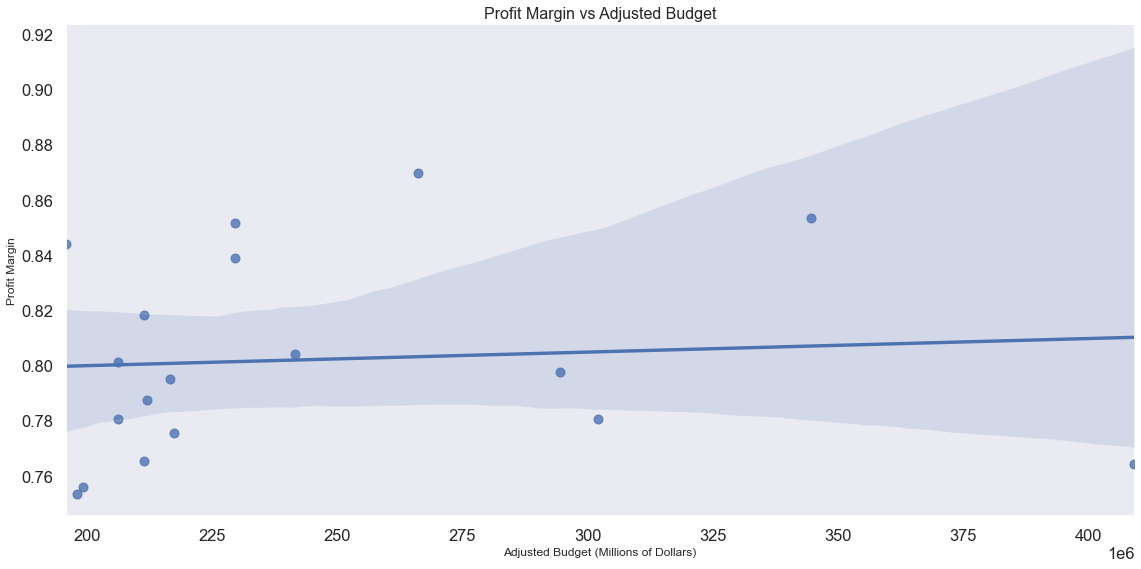

In [46]:
sns.lmplot(x='adjusted_budget', y='profit_margin', data=filtered_data, height= 8, aspect=2)
plt.xlabel('Adjusted Budget (Millions of Dollars)', fontsize=12)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.ylabel('Profit Margin', fontsize=12)
plt.title('Profit Margin vs Adjusted Budget', fontsize=16);

In [47]:
filtered_data.describe()


,index,production_budget,domestic_gross,worldwide_gross,release_year,start_year,runtime_minutes,averagerating,numvotes,profit,profit_margin,adjusted_budget,adjusted_profit
count,18.000000,1.800000e+01,1.800000e+01,1.800000e+01,18.00000,18.00000,18.000000,18.000000,18.000000,1.800000e+01,18.000000,1.800000e+01,1.800000e+01
mean,68.722222,2.044778e+08,4.054642e+08,1.079226e+09,2016.50000,2016.50000,124.722222,7.411111,416519.055556,8.747485e+08,0.802120,2.439784e+08,1.040063e+09
std,42.732830,4.807803e+07,1.613419e+08,3.655905e+08,1.20049,1.20049,16.090938,0.633282,164245.236101,3.304041e+08,0.036144,5.846346e+07,3.836438e+08
min,3.000000,1.600000e+08,2.097260e+08,6.489868e+08,2015.00000,2015.00000,95.000000,6.000000,179774.000000,4.889868e+08,0.753462,1.957900e+08,6.051700e+08
25%,35.000000,1.750000e+08,2.900575e+08,8.135471e+08,2016.00000,2016.00000,115.750000,7.075000,258586.500000,6.340011e+08,0.776931,2.074844e+08,7.603093e+08
50%,83.500000,1.800000e+08,3.602314e+08,9.920349e+08,2016.00000,2016.00000,127.000000,7.350000,454648.500000,8.045349e+08,0.796342,2.170010e+08,9.717977e+08
75%,98.750000,2.112500e+08,4.794731e+08,1.240602e+09,2017.00000,2017.00000,135.500000,7.775000,535395.500000,1.028102e+09,0.833840,2.599580e+08,1.188088e+09
max,140.000000,3.306000e+08,7.000596e+08,2.048134e+09,2019.00000,2019.00000,149.000000,8.500000,670926.000000,1.748134e+09,0.869606,4.091506e+08,2.007732e+09


### Q1 Conclusions and Recommendations
The Avenger was the most profitable movie produced since 2015 with a adjusted production_budget of 344550000 and adjusted_profit of 2.007732e+09 .Microsoft should consider investing of like nature like avengers which had the highest profit margin. 325 out of 433 profitable movies have a profit margin of 50%. The top 20 genres have a profit margin of 85.7% with adjusted median budget of $ 1955175000. 

To check for patterns, we reexamine the data in a scatter plot. When we look at the margin of profit vs the productin_budget, our data is considerably more dispersed. The positive slope of the trend line in this graph should serve a good indicator that microsoft can invest in any of the top 20 movies without having to fear loosing money
I recommend microsoft to invest a budget of 10309250000 dollars for a profit margin of 80.23% in one of the top 20 movies


### Q2: What genres have the most movies produced? 
Although movie like Avengers: Affinity War produced much profit, it may not be possible for microsoft to replicated a similar movies. Instead, it is important to focus on the genre categories that are more foritable Although some genres are more profitable than others, some companies may not produce them because of their higher production_budget. Thus, it is also important to advice microsof on the most produce genres since 2015 for them to make an informed decision

In [48]:
combined_data.head ()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,profit,profit_margin,adjusted_budget,adjusted_profit
742,2015-01-16,Blackhat,70000000,8005980,19665004,2015,January,tt2717822,Blackhat,Blackhat,2015.0,133.0,"Action,Crime,Thriller",5.4,48427.0,-50334996,-2.559623,86632000.0,-6.229459e+07
2328,2015-01-16,The Wedding Ringer,23000000,64460211,80171596,2015,January,tt0884732,The Wedding Ringer,The Wedding Ringer,2015.0,101.0,Comedy,6.7,66893.0,57171596,0.713115,28464800.0,7.075557e+07
942,2015-01-23,Mortdecai,60000000,7696134,30396134,2015,January,tt3045616,Mortdecai,Mortdecai,2015.0,107.0,"Action,Comedy,Crime",5.5,61366.0,-29603866,-0.973935,74256000.0,-3.663774e+07
4286,2015-01-23,The Boy Next Door,4000000,36006065,53401938,2015,January,tt3181822,The Boy Next Door,The Boy Next Door,2015.0,91.0,"Horror,Thriller",4.7,34816.0,49401938,0.925096,4950400.0,6.113984e+07
3295,2015-01-30,Project Almanac,12000000,22348241,32909437,2015,January,tt2436386,Project Almanac,Project Almanac,2015.0,106.0,"Drama,Mystery,Sci-Fi",6.4,71500.0,20909437,0.635363,14851200.0,2.587752e+07


In [49]:
# spliting the genre to individual genres for each movie and creating a new column for the genre_list
combined_data['genre_list'] = combined_data['genres'].str.split(',')
combined_data = combined_data.explode('genre_list')
combined_data.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,profit,profit_margin,adjusted_budget,adjusted_profit,genre_list
742,2015-01-16,Blackhat,70000000,8005980,19665004,2015,January,tt2717822,Blackhat,Blackhat,2015.0,133.0,"Action,Crime,Thriller",5.4,48427.0,-50334996,-2.559623,86632000.0,-6.229459e+07,Action
742,2015-01-16,Blackhat,70000000,8005980,19665004,2015,January,tt2717822,Blackhat,Blackhat,2015.0,133.0,"Action,Crime,Thriller",5.4,48427.0,-50334996,-2.559623,86632000.0,-6.229459e+07,Crime
742,2015-01-16,Blackhat,70000000,8005980,19665004,2015,January,tt2717822,Blackhat,Blackhat,2015.0,133.0,"Action,Crime,Thriller",5.4,48427.0,-50334996,-2.559623,86632000.0,-6.229459e+07,Thriller
2328,2015-01-16,The Wedding Ringer,23000000,64460211,80171596,2015,January,tt0884732,The Wedding Ringer,The Wedding Ringer,2015.0,101.0,Comedy,6.7,66893.0,57171596,0.713115,28464800.0,7.075557e+07,Comedy
942,2015-01-23,Mortdecai,60000000,7696134,30396134,2015,January,tt3045616,Mortdecai,Mortdecai,2015.0,107.0,"Action,Comedy,Crime",5.5,61366.0,-29603866,-0.973935,74256000.0,-3.663774e+07,Action


In [50]:
# Movies by genre
by_genre = combined_data.groupby('genre_list', as_index=False)['movie'].count().sort_values(by='movie', ascending=False)
by_genre

,genre_list,movie
7,Drama,270
4,Comedy,183
0,Action,173
1,Adventure,156
18,Thriller,86
5,Crime,83
3,Biography,75
11,Horror,68
16,Sci-Fi,58
14,Mystery,52


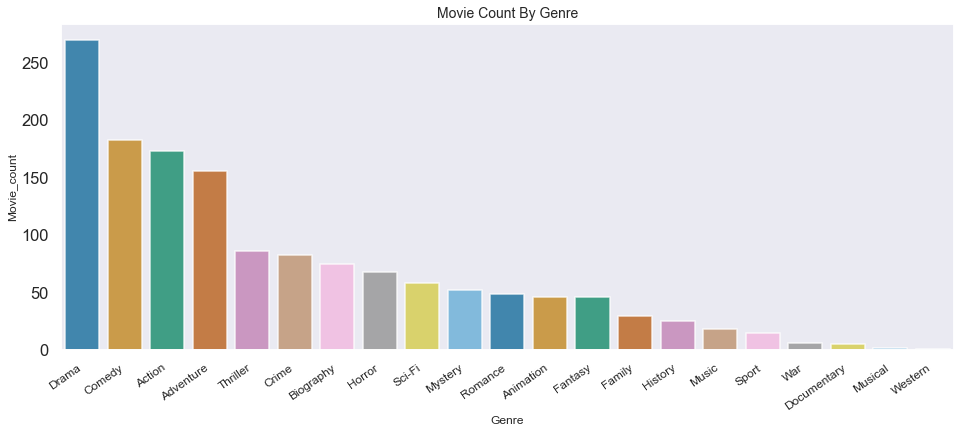

In [51]:
# Visualizing the above results
plt.figure(figsize=(16,6))
sns.barplot(x= by_genre ['genre_list'],y= by_genre['movie'], 
            palette='colorblind',alpha=0.8, label='profit', ci=None)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Movie_count', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.title('Movie Count By Genre', fontsize=14);

#### Q2 Conclusions and Recommendations
From the the graph above, it is clear that the most produced genre is drama and the least produced genre is western. Microsoft can consider venturing into the three most produced genres Drama,Comedy, and action. Though Drama movies are most produced, they do not necessarily mean they have higher profit margin than others genres like mystery. However, it is also important to determine which genre has the most ratings that others.That will take is to the next question. 

#### Q3. Which Genre has the highest ratings. Does the ratings translate to higher profit margins?
This question will help microsoft to understand which genre customers rate the most to lead in making decision on whether to invest in such genres. However, it is important also to determine whether the ratings translate in higher profits before making such a decision

##### Genre vs Rating

In [52]:
# Group by genre and determine the overall median ordered by rating.
genre_rating = combined_data.groupby('genre_list') \
                             .median()[['averagerating','profit_margin']] \
                             .sort_values('averagerating', ascending=False) \
                    
genre_rating.reset_index(inplace=True)

genre_rating

,genre_list,averagerating,profit_margin
0,Musical,7.40,0.827847
1,History,7.20,0.507863
2,Sport,7.10,0.305056
3,Biography,7.10,0.430821
4,Western,6.90,0.446240
5,Drama,6.80,0.536343
6,Family,6.65,0.580627
7,Animation,6.60,0.695028
8,Music,6.55,0.592681
9,Documentary,6.50,0.551552


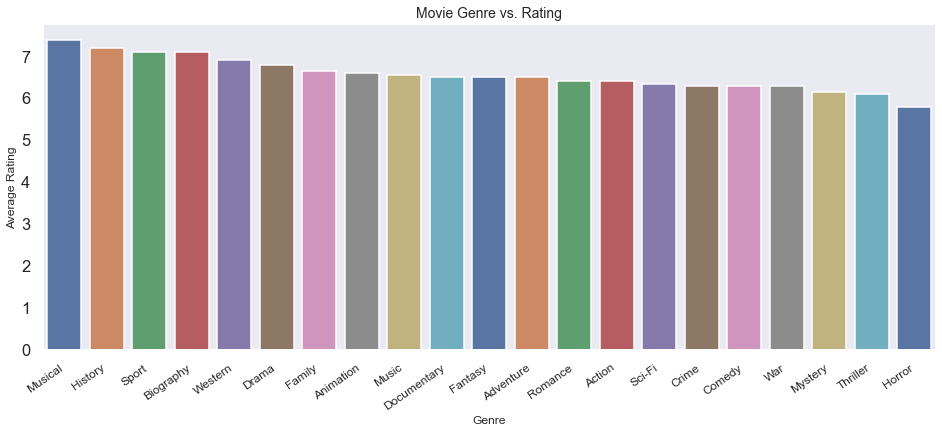

In [53]:
# visualizing genre vs averagerating

plt.figure(figsize=(16,6))
sns.barplot(data=genre_rating,
    x="genre_list", y="averagerating", palette='deep')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.title('Movie Genre vs. Rating', fontsize=14);


The musical genre has the highest ratings followd by history and sport genres. Horror category has the least ratings

##### Does movies with high rating translate to higher profits?
We will answer this question by ascertain the profit of each genre and compare with the their profit

In [54]:
## Group by genre and calculate aggregate median sorted by profit_margin.
genre_profit = combined_data.groupby('genre_list') \
                             .median()[['averagerating','profit_margin']] \
                             .sort_values('profit_margin', ascending=False)\

genre_profit.reset_index(inplace=True)
genre_profit


,genre_list,averagerating,profit_margin
0,Musical,7.40,0.827847
1,Mystery,6.15,0.792239
2,Horror,5.80,0.759982
3,Animation,6.60,0.695028
4,Sci-Fi,6.35,0.635707
5,Thriller,6.10,0.634911
6,Comedy,6.30,0.631288
7,Adventure,6.50,0.630315
8,Music,6.55,0.592681
9,Family,6.65,0.580627


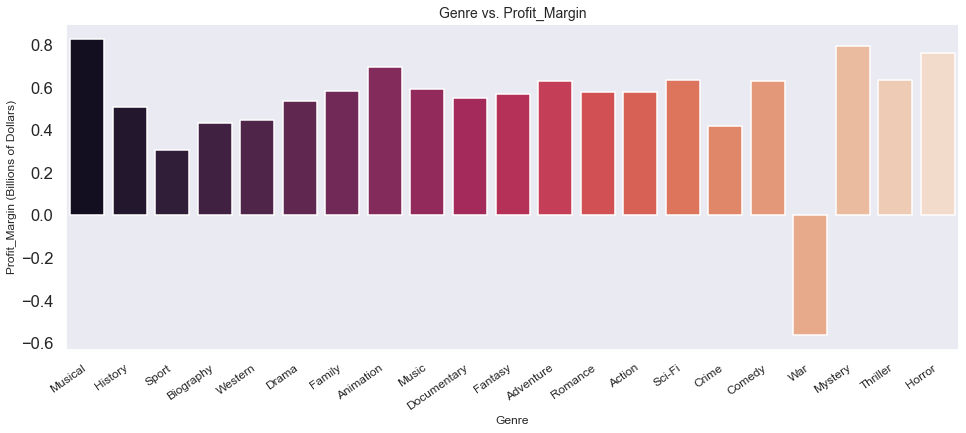

In [55]:
#visualizing the above data

plt.figure(figsize=(16,6))
sns.barplot(data=genre_rating,
    x="genre_list", y="profit_margin", palette='rocket')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Profit_Margin (Billions of Dollars)', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.title('Genre vs. Profit_Margin', fontsize=14);

#### Q3 Conclusions and Recommendations
From the above analysis, musical genre had the highest ratings and the highest profit_margins. In such a genre, ratings positively correlate with profit margins. However, we cannot conclusively state such a rule applies to other genres. For instance, horror genre has the lowest ratings, but is second in terms for profit_margins. Therefore, microsoft should not solely rely on ratings of the genres to inform its decision in what genre to invest in, but should also evaluate the production_budget too. However, microsoft should avoid by all means investing war genre which as a negative profit_margin. Since data utilized was from 2015, we will still rely on adjusted budget that has incorperated the current US inflation rate. For instance, the production_budget of Avenger:Infinit War in 2018 was to 300000000. After adjust the higher inflation rate in 2023, the budget esclated to 344550000

#### Q4: Which Genres have the Lowest and Highest production_cost per 2023 economy



###### Genres with highest production cost

In [56]:
# 10 genres with the highest production cost
highest_cost = combined_data.groupby('genre_list') \
                            .mean()[['adjusted_budget']] \
                            .sort_values('adjusted_budget', \
                                         ascending=False) \
                            .head(11)
highest_cost.reset_index(inplace=True)
highest_cost = highest_cost[highest_cost['genre_list'] != 'None']
highest_cost

,genre_list,adjusted_budget
0,Musical,1.437404e+08
1,Adventure,1.306887e+08
2,Fantasy,1.280590e+08
3,Sci-Fi,1.251224e+08
4,Western,1.087110e+08
5,Action,1.083759e+08
6,Animation,1.058538e+08
7,Family,1.047127e+08
8,Comedy,5.432637e+07
9,History,4.573406e+07


###### Genres with lowest production cost


In [57]:
# 10 genres with the lowest production cost
lowest_cost = combined_data.groupby('genre_list') \
                            .mean()[['adjusted_budget']] \
                            .sort_values('adjusted_budget', \
                                         ascending=False) \
                            .tail(11)
lowest_cost.reset_index(inplace=True)
lowest_cost = lowest_cost[lowest_cost['genre_list'] != 'None']
lowest_cost

,genre_list,adjusted_budget
0,Thriller,4.201860e+07
1,Crime,4.126480e+07
2,Documentary,3.915832e+07
3,Drama,3.477275e+07
4,Biography,3.301603e+07
5,Sport,3.158029e+07
6,Romance,2.665637e+07
7,Music,2.307984e+07
8,Mystery,2.215060e+07
9,Horror,2.011200e+07


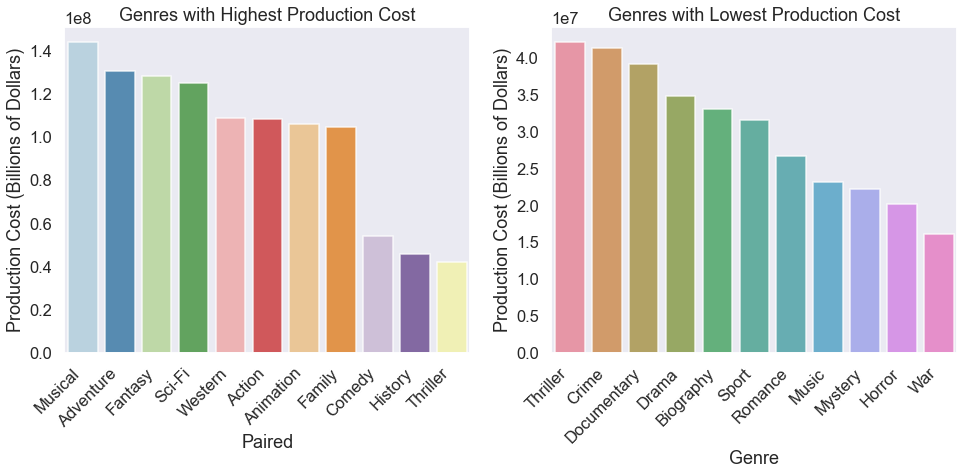

In [58]:
#Ploting lowest and highest production costs and associated genres

fig, axes = plt.subplots(ncols=2, figsize=(16,6))

sns.barplot(data=highest_cost,
    x="genre_list", y="adjusted_budget",
    ax=axes[0], palette='Paired', alpha=.8)

axes[0].set_title('Genres with Highest Production Cost')
axes[0].set_xlabel('Paired')
axes[0].set_ylabel('Production Cost (Billions of Dollars)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

sns.barplot(data=lowest_cost,
    x="genre_list", y="adjusted_budget",
    ax=axes[1], palette='husl', alpha=.8)

axes[1].set_title('Genres with Lowest Production Cost')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Production Cost (Billions of Dollars)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right');

Q4 Conclusions and Recommendations

From the analysis, musical genre seems to have high production cost, but lower also higher profitability. Depending on the budget set aside for the new movie venture, microsoft can either consider in investing in high budget movies or low budget movies. 

### 5. What is the best time of the year to release a movie?


It is also essential to advise microsoft on which time of the year is best to release a movie. Movies perform better in the market during certain seasons

In [59]:
# Lets start by counting the number of movies produced since 2015 and group them by month
movie_month = combined_data.groupby(['release_month'], as_index=False)['movie'].count().sort_values(by='movie', ascending=False)
movie_month

,release_month,movie
9,November,152
10,October,143
2,December,141
7,March,138
6,June,136
11,September,127
5,July,122
1,August,114
3,February,105
8,May,105


Most movies are released on the month of November,October, and December and least released on January, April, and May

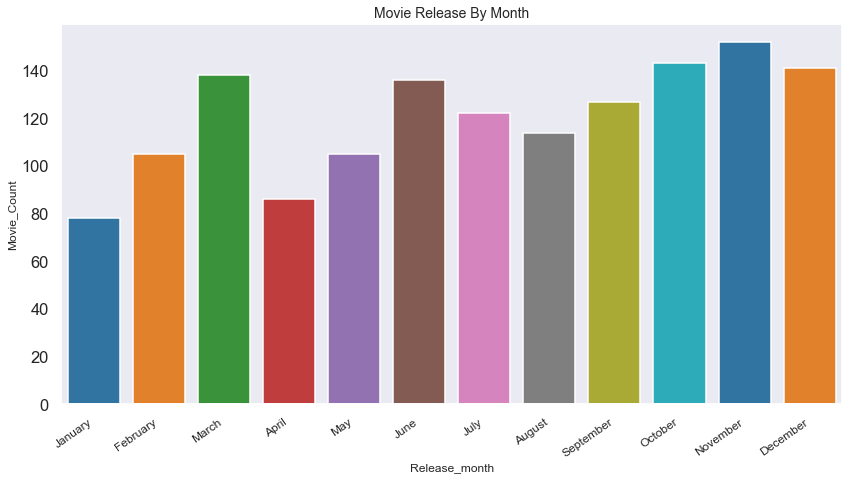

In [60]:
# Dislaying the above results
plt.figure(figsize=(14,7))
ax4 = sns.countplot(x= combined_data['release_month'], palette='tab10',
                   order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Release_month', fontsize=12)
plt.ylabel('Movie_Count', fontsize=12)
plt.title('Movie Release By Month', fontsize=14)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12);

##### Release Month and Profit Margin
Which release month has the highest profit_margin

In [61]:
profit_by_releaseMonth = combined_data.groupby('release_month') \
                             .median()[['adjusted_profit','profit_margin']] \
                             .sort_values('profit_margin', ascending=False)\

profit_by_releaseMonth.reset_index(inplace=True)
profit_by_releaseMonth

,release_month,adjusted_profit,profit_margin
0,July,1.313389e+08,0.749450
1,February,4.694843e+07,0.657111
2,November,7.202452e+07,0.647865
3,April,4.824726e+07,0.647006
4,March,6.823037e+07,0.643832
5,January,3.714199e+07,0.635363
6,December,5.042391e+07,0.617041
7,May,7.567868e+07,0.594702
8,June,3.731365e+07,0.573054
9,September,3.556837e+07,0.517382


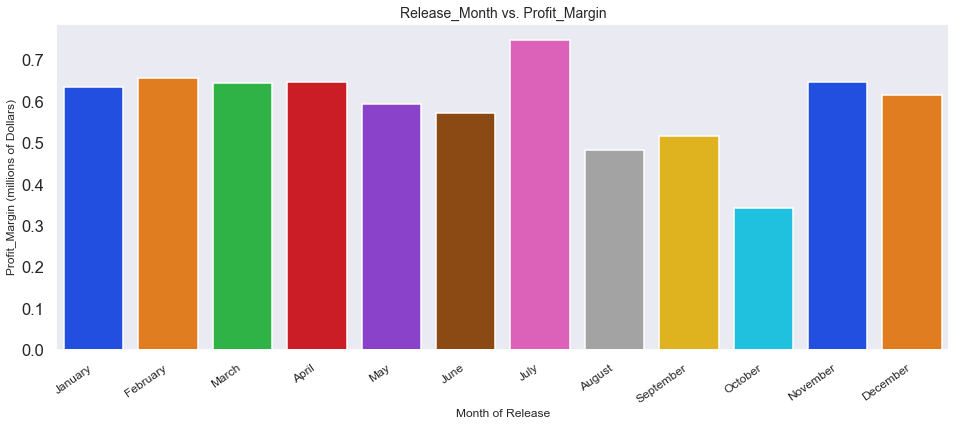

In [62]:
# Displaying the above results
plt.figure(figsize=(16,6))
sns.barplot(data= profit_by_releaseMonth,
    x="release_month", y="profit_margin", palette='bright',order= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month of Release', fontsize=12)
plt.ylabel('Profit_Margin (millions of Dollars)', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.title('Release_Month vs. Profit_Margin', fontsize=14);

##### Q5: conclusions and Recommendations

Timings in releasing a movie plays critical in movie industry. A company can spend alot in producing a very good movie, but its timing to release the movie to the market make the movie not meet the expected profit margin. From the data, microsoft should be releasing the movies on the month of November and december
In terms of profit_margin per release month, there is an interesting trend on the month of july which apears to have high profits. This may be attributed to the summer season being among the months where people watch alot. However, the margins seems to be within same range from january to april. The month of november and december also seems to have good returns

##### Final Conclusions

Give the findings from the above analysis, Microsoft can consider investing in Musical genres since I don’t think production budget will be a big challenge for the giant tech company.
Such a genre will make the organization have good return on investments and maintain its reputation
Alternatively, the company can choose low budget movies such as horror which also has high returns.
However, since horror genre has lowest ratings, it should be a secondary option after musicals